In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset  = pd.read_csv('/content/drive/MyDrive/Self Organizing Map/creditcard_2023.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)



In [5]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=9540616839054176e0bd54238c5a0896dba1fd1fd6b9b4f6be5c7bf4fdf26d67
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [7]:
from minisom import MiniSom

In [8]:
som = MiniSom(10,10,input_len = 30 , sigma = 1.0 , learning_rate=0.5)

In [9]:
som.random_weights_init(X)  # Initialing the weights
som.train_random(data = X , num_iteration = 1000)


In [10]:
## Visualizing the REsults
from pylab import bone , colorbar , pcolor , plot , show

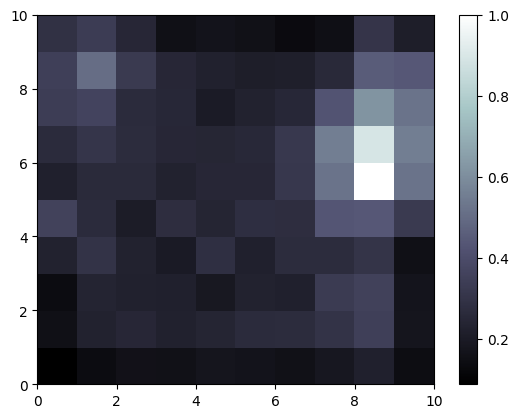

In [11]:
bone()
pcolor(som.distance_map().T)
colorbar()

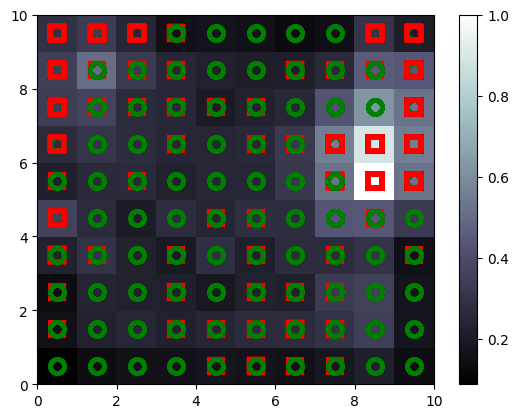

In [12]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['g','r'] # Green to indicate they are not a fraud and red to indicate that they are fraud
for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5 ,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10 ,
       markeredgewidth = 3)
show()

In [14]:
mappings = som.win_map(X)

frauds = np.concatenate((mappings[(8,5)],mappings[(8,6)]),axis = 0)


frauds = sc.inverse_transform(frauds)
fraud_id_list = []
for i in frauds[: , 0]:
  fraud_id_list.append(int(i))

In [15]:
len(fraud_id_list)

73763

In [16]:
dataset['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64